In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
Classes = ["background", "aeroplane", "bicycle", "bird", "boat",
"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
"sofa", "train", "tvmonitor"]
Colors = np.random.uniform(0, 255, size=(len(Classes), 3))

In [3]:
print("Classes are :\n",Classes)
print("Colors for represented of classes are : \n " ,Colors)

Classes are :
 ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
Colors for represented of classes are : 
  [[236.9461516  213.40274823 136.44049808]
 [128.62148655  42.08398027 115.9610129 ]
 [174.23593031  87.51019501  37.35726207]
 [ 46.39267328  21.88493669  91.74909121]
 [ 61.36453449 169.06747515  56.46912857]
 [ 75.26570441  66.13968952   5.20529406]
 [ 13.24651581 229.9264153  213.57015325]
 [207.03455517  42.45143081 214.27509562]
 [178.13143265 120.04051829 205.58826021]
 [ 90.9416897  223.20461434 113.12670066]
 [231.62841975 197.74964187   1.10609635]
 [219.39941274 215.01592434  96.75632369]
 [126.83695166 246.76196388  47.28916831]
 [186.24630508 221.84865147  53.87078966]
 [216.8449408   29.17801484  97.15115724]
 [141.10838644 183.69973818 167.76995327]
 [150.75110057  37.35770647 163.74036662]
 [178.29905404 105

In [4]:
for path in ['MobileNetSSD_deployprototxt.txt','MobileNetSSD_deploy.caffemodel']:
    print(os.path.exists(path))

True
True


In [5]:
# load our serialized model from disk
#loading a pre-trained Caffe network.
print("[INFO] Loading model...........")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deployprototxt.txt','MobileNetSSD_deploy.caffemodel')
print("[INFO] Loading Complete")


[INFO] Loading model...........
[INFO] Loading Complete


In [6]:
def detector_model(image_name):
    image = cv2.imread(image_name)
    image= cv2.resize(image, (500, 500))
    figsize = (8,18)
    plt.figure(figsize=figsize)
   
    plt.imshow(image)
    #plt.figure.subtitle('test title', fontsize=20)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 0.007843,(500, 500), 127.5)
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()

    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.41:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(Classes[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),Colors[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, Colors[idx], 2)
        
     # show the output image
    figsize = (8,18)
    plt.figure(figsize=figsize)
    
    plt.imshow(image)
    #plt.figure.subtitle('Image After Object Detection',fontsize=20)
    #cv2.imshow("Output", image)
    #cv2.waitKey(0)


[INFO] computing object detections...
[INFO] car: 99.46%
[INFO] car: 99.37%
[INFO] car: 94.28%
[INFO] car: 85.37%
[INFO] car: 84.20%
[INFO] car: 84.17%
[INFO] car: 80.28%
[INFO] car: 77.11%
[INFO] car: 76.45%
[INFO] car: 64.27%
[INFO] car: 53.43%
[INFO] car: 47.78%


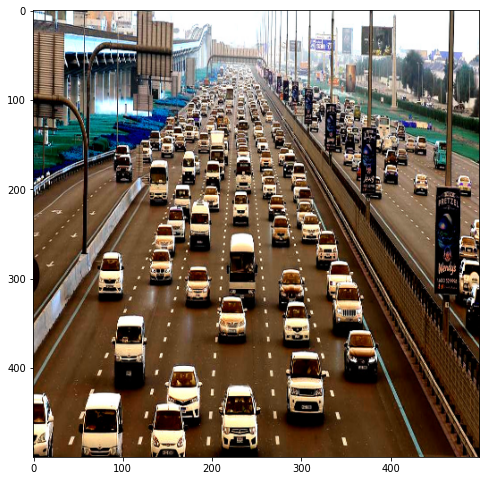

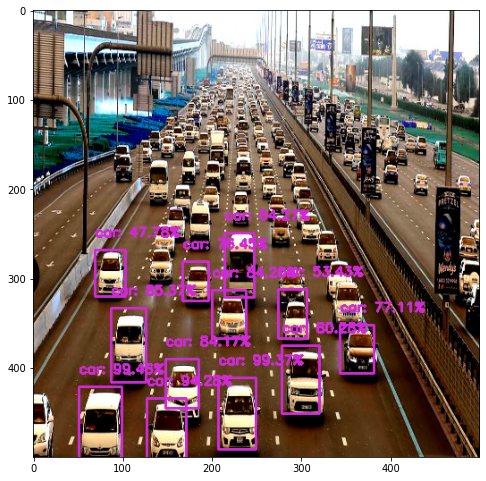

In [7]:
# Results 
detector_model('cars34.jpeg')